Colorization

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, UpSampling2D, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import  array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
img = Image.open('/Users/apple/python/SkillFactory/Ml_learning/selfedu_lessons/cerasss/colorgirl.png')


def precossed_image(img):
    # Ensure the image is in RGB mode (remove alpha channel if it exists)
    img = img.convert("RGB")
    image = img.resize((256, 256), Image.BILINEAR)
    image = np.array(image, dtype=float)
    size = image.shape
    lab = rgb2lab(1.0 / 255 * image)
    x, y = lab[:, :, 0], lab[:, :, 1:]

    y /= 128
    x = x.reshape(1, size[0], size[1], 1)
    y = y.reshape(1, size[0], size[1], 2)
    return x, y, size

In [11]:
x, y, size = precossed_image(img)

In [12]:
model = Sequential()
model.add(InputLayer(shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [13]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=x, y=y, batch_size=1, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0210
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.6365
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 1.0052
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 0.2018
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.0250
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 0.0221
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - loss: 0.0188
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0260
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0174
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.0184
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.0168
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.0164
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.0152
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 0.0152
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.0142
Epoch 1

In [14]:
img2 = Image.open('/Users/apple/python/SkillFactory/Ml_learning/selfedu_lessons/cerasss/darkgirl.png')
x, y, size = precossed_image(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


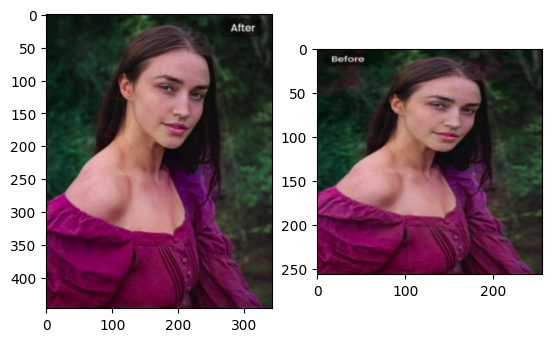

In [15]:
output = model.predict(x)
output *= 128

min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(x[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))